<a href="https://colab.research.google.com/github/BaranikumarNagarajan/-Data-Science-Job_-Prediction/blob/main/Data_Science_Job__Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler


In [10]:
data = pd.read_csv('/content/data_science_job.csv')


In [11]:
data.head(10)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0
5,21651,city_176,0.764,NaN,Has relevent experience,Part time course,Graduate,STEM,11.0,NaN,NaN,24.0,1.0
6,28806,city_160,0.920,Male,Has relevent experience,no_enrollment,High School,NaN,5.0,50-99,Funded Startup,24.0,0.0
7,402,city_46,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,13.0,<10,Pvt Ltd,18.0,1.0
8,27107,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,7.0,50-99,Pvt Ltd,46.0,1.0
9,699,city_103,0.920,NaN,Has relevent experience,no_enrollment,Graduate,STEM,17.0,10000+,Pvt Ltd,123.0,0.0


In [12]:
data = data.drop(columns=['enrollee_id'])

In [32]:
data.isnull().sum()

,0
city,0
city_development_index,0
gender,0
relevent_experience,0
enrolled_university,0
education_level,0
major_discipline,0
experience,0
company_size,0
company_type,0


In [33]:
data.describe()

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000,19158.000000,19158.000000,19158.000000,19158.000000,19158.000000,19158.000000,19158.000000,19158.000000
mean,44.193914,0.830802,0.945349,0.280092,1.545255,0.689686,4.717768,9.924888,3.355622,4.489560,64.458660,0.249348
std,35.464009,0.122330,0.267595,0.449056,0.800123,0.995951,0.950982,6.494447,1.783737,1.297027,58.784219,0.432647
min,0.000000,0.448000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,5.000000,0.743000,1.000000,0.000000,1.000000,0.000000,5.000000,4.000000,2.000000,5.000000,24.000000,0.000000
50%,48.000000,0.903000,1.000000,0.000000,2.000000,0.000000,5.000000,9.000000,4.000000,5.000000,47.000000,0.000000
75%,64.000000,0.920000,1.000000,1.000000,2.000000,2.000000,5.000000,16.000000,4.000000,5.000000,86.000000,0.000000
max,122.000000,0.949000,2.000000,1.000000,2.000000,4.000000,5.000000,20.000000,7.000000,5.000000,336.000000,1.000000


In [13]:
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = data.select_dtypes(include=['object']).columns

num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')

data[numerical_cols] = num_imputer.fit_transform(data[numerical_cols])
data[categorical_cols] = cat_imputer.fit_transform(data[categorical_cols])


In [14]:
data.head(10)

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,50-99,Pvt Ltd,36.0,1.0
1,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,city_21,0.624,Male,No relevent experience,Full time course,Graduate,STEM,5.0,50-99,Pvt Ltd,83.0,0.0
3,city_115,0.789,Male,No relevent experience,no_enrollment,Graduate,Business Degree,0.0,50-99,Pvt Ltd,52.0,1.0
4,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0
5,city_176,0.764,Male,Has relevent experience,Part time course,Graduate,STEM,11.0,50-99,Pvt Ltd,24.0,1.0
6,city_160,0.920,Male,Has relevent experience,no_enrollment,High School,STEM,5.0,50-99,Funded Startup,24.0,0.0
7,city_46,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,13.0,<10,Pvt Ltd,18.0,1.0
8,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,7.0,50-99,Pvt Ltd,46.0,1.0
9,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,17.0,10000+,Pvt Ltd,123.0,0.0


In [15]:
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

In [16]:
X = data.drop(columns=['target'])
y = data['target']


In [35]:
data.head(10)

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,5,0.920,1,0,2,0,5,20.0,4,5,36.0,1.0
1,77,0.776,1,1,2,0,5,15.0,4,5,47.0,0.0
2,64,0.624,1,1,0,0,5,5.0,4,5,83.0,0.0
3,14,0.789,1,1,2,0,1,0.0,4,5,52.0,1.0
4,50,0.767,1,0,2,2,5,20.0,4,1,8.0,0.0
5,57,0.764,1,0,1,0,5,11.0,4,5,24.0,1.0
6,49,0.920,1,0,2,1,5,5.0,4,1,24.0,0.0
7,83,0.762,1,0,2,0,5,13.0,7,5,18.0,1.0
8,5,0.920,1,0,2,0,5,7.0,4,5,46.0,1.0
9,5,0.920,1,0,2,0,5,17.0,3,5,123.0,0.0


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [19]:
model = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10, class_weight='balanced')


In [20]:
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, random_state=42)

In [21]:
y_pred = model.predict(X_test)

In [22]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7562630480167014

Classification Report:
               precision    recall  f1-score   support

         0.0       0.88      0.78      0.83      2880
         1.0       0.51      0.68      0.58       952

    accuracy                           0.76      3832
   macro avg       0.69      0.73      0.70      3832
weighted avg       0.79      0.76      0.77      3832


Confusion Matrix:
 [[2255  625]
 [ 309  643]]


In [23]:

feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
print("\nFeature Importances:\n", feature_importances)


Feature Importances:
                    Feature  Importance
1   city_development_index    0.359793
0                     city    0.130131
8             company_size    0.120237
7               experience    0.103177
10          training_hours    0.089612
5          education_level    0.047914
4      enrolled_university    0.046541
9             company_type    0.039204
3      relevent_experience    0.036079
6         major_discipline    0.016308
2                   gender    0.011002


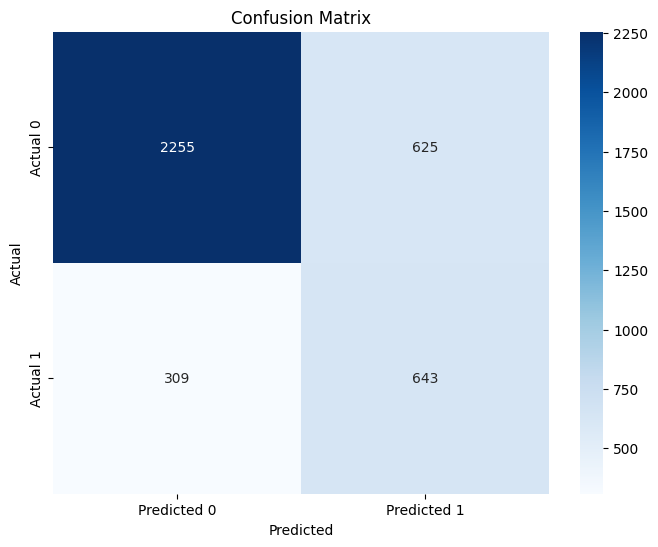

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


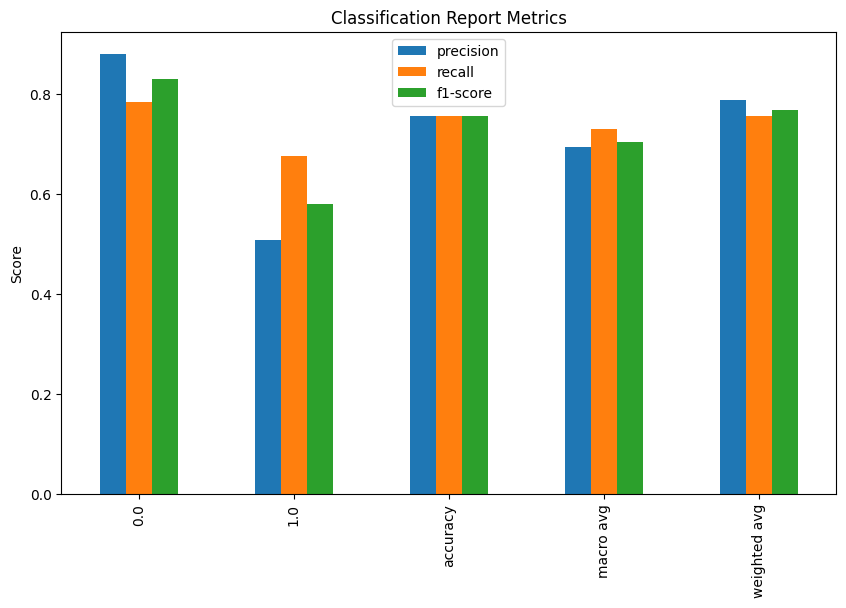

In [25]:
from sklearn.metrics import classification_report

# Get classification report
report = classification_report(y_test, y_pred, output_dict=True)

# Convert report to DataFrame
report_df = pd.DataFrame(report).transpose()

# Plot Precision, Recall, and F1-Score for each class
report_df[['precision', 'recall', 'f1-score']].plot(kind='bar', figsize=(10, 6))
plt.title('Classification Report Metrics')
plt.ylabel('Score')
plt.show()


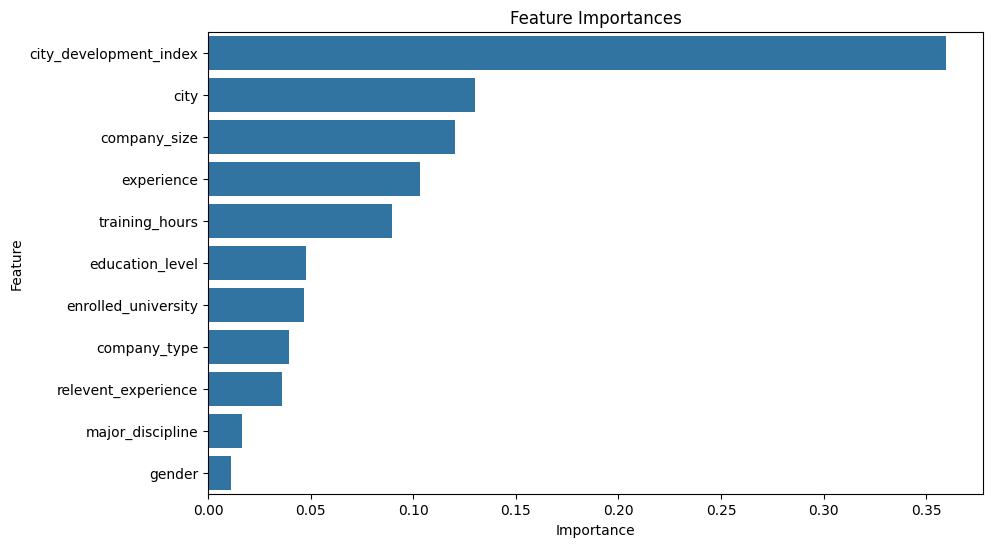

In [26]:
# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


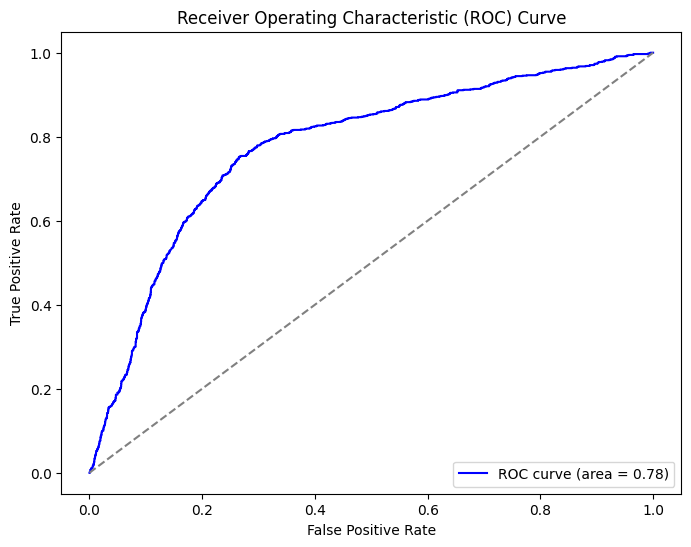

In [27]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


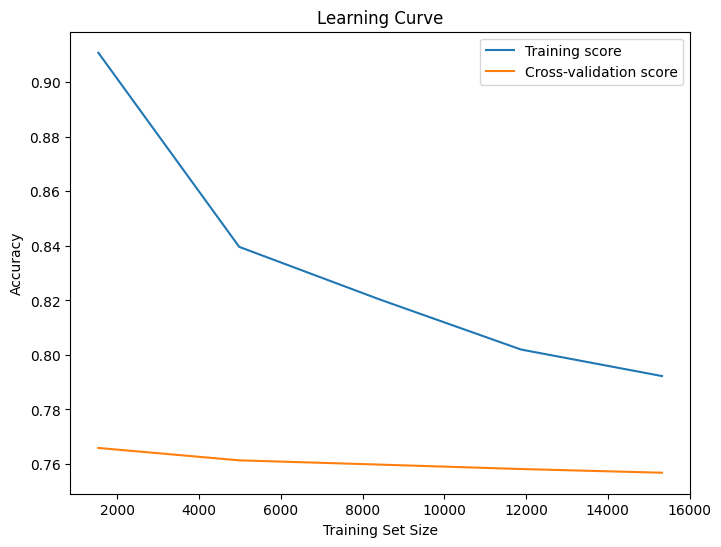

In [28]:
from sklearn.model_selection import learning_curve

# Get learning curve data
train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, n_jobs=-1)

# Plot learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Cross-validation score')
plt.title('Learning Curve')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
